### Import Libraries

In [53]:
import pandas as pd

### Load the csv files

In [54]:
train = pd.read_csv("csv files/backfilled_data.csv")
train

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_O51ZQ1B,2001-12-11,2011-12-10,Female,37.0,2001-12-11,1,Saloon,Black,Honda,Ekiti,Benue,Car Vintage,0
1,ID_VJ1FAVO,2002-03-25,2011-03-24,Male,37.0,2002-03-25,1,Saloon,Black,TOYOTA,Ekiti,Benue,Car Classic,0
2,ID_ULWS8VL,2003-04-13,2011-04-12,Male,41.0,2003-04-13,2,Saloon,Black,TOYOTA,Ikeja,Lagos,Car Vintage,0
3,ID_ZYKGSP7,2003-12-21,2034-05-20,Male,48.0,2003-12-21,2,Saloon,Gold,BMW,Ajah,Lagos,Car Vintage,0
4,ID_OEWBKGF,2005-08-05,2011-09-29,Female,44.0,2005-08-05,1,Saloon,Gold,Tata,Ajah,Lagos,CVTP,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_MLGO8DZ,2010-12-31,2011-06-30,Male,51.0,2010-12-31,4,Saloon,Black,Honda,Victoria Island,Lagos,Car Classic,0
12075,ID_62LBOWI,2010-12-31,2011-12-30,Male,44.0,2010-12-31,1,JEEP,Silver,Hyundai,Victoria Island,Lagos,Car Classic,0
12076,ID_XR8F115,2010-12-31,2011-12-30,Male,37.0,2010-12-31,1,JEEP,Silver,Hyundai,Anthony Village,Lagos,CarSafe,0
12077,ID_8P2UGYO,2010-12-31,2011-12-30,Male,20.0,2010-12-31,1,Saloon,Silver,Kia,Anthony Village,Lagos,CarSafe,0


## Analytical Questions

### Claim Approval Rate per Product Name

In [55]:
claim_rate = train.groupby("ProductName")["target"].mean().sort_values(ascending=False) * 100
print("Claim Rate per Product Type (%):")
print(claim_rate)

Claim Rate per Product Type (%):
ProductName
Muuve               69.892473
CVTP                25.586354
Car Plus            21.193416
Motor Cycle         17.391304
Car Classic         16.561295
CarFlex             16.477273
Customized Motor     7.706422
CarSafe              0.370959
Car Vintage          0.000000
Name: target, dtype: float64


### Volume of Policies per Product Name

In [13]:
policy_count = train["ProductName"].value_counts()
policy_count

ProductName
Car Classic         6485
CarSafe             3774
Customized Motor     545
Car Plus             486
CVTP                 469
CarFlex              176
Muuve                 93
Motor Cycle           46
Car Vintage            5
Name: count, dtype: int64

### Number of Claims Submitted Within 3 Months

In [56]:
claims_by_product = train[train["target"] == 1]["ProductName"].value_counts()
print("\nTotal Claims per Product Type:")
print(claims_by_product)


Total Claims per Product Type:
ProductName
Car Classic         1074
CVTP                 120
Car Plus             103
Muuve                 65
Customized Motor      42
CarFlex               29
CarSafe               14
Motor Cycle            8
Name: count, dtype: int64


### No claims Within 3 Months

In [15]:
non_claims_by_product = train[train["target"] == 0]["ProductName"].value_counts()
print("\nTotal Non-Claims per Product Type:")
print(non_claims_by_product)


Total Non-Claims per Product Type:
ProductName
Car Classic         5411
CarSafe             3760
Customized Motor     503
Car Plus             383
CVTP                 349
CarFlex              147
Motor Cycle           38
Muuve                 28
Car Vintage            5
Name: count, dtype: int64


### Summary

In [21]:
summary = pd.DataFrame({
    "Total Policies": train["ProductName"].value_counts(),
    "Total Claims": train[train["target"] == 1]["ProductName"].value_counts(),
    "No Claims": train[train["target"] == 0]["ProductName"].value_counts(),
    "Claim Rate (%)": train.groupby("ProductName")["target"].mean() * 100
}).sort_values(by="Claim Rate (%)", ascending=False)

print("\nSummary Table per Product Type:")
summary


Summary Table per Product Type:


,Total Policies,Total Claims,No Claims,Claim Rate (%)
ProductName,,,,
Muuve,93,65.0,28,69.892473
CVTP,469,120.0,349,25.586354
Car Plus,486,103.0,383,21.193416
Motor Cycle,46,8.0,38,17.391304
Car Classic,6485,1074.0,5411,16.561295
CarFlex,176,29.0,147,16.477273
Customized Motor,545,42.0,503,7.706422
CarSafe,3774,14.0,3760,0.370959
Car Vintage,5,NaN,5,0.000000


In [23]:
train.columns

Index(['ID', 'Policy_Start_Date', 'Policy_End_Date', 'Gender', 'Age',
       'First_Transaction_Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

In [29]:
colour = pd.DataFrame(train["Subject_Car_Colour"].value_counts())
colour

,count
Subject_Car_Colour,
Black,4362
Silver,1349
Grey,1257
As Attached,1196
Blue,833
Red,680
White,649
Green,569
Gold,383


In [26]:
popular_car_make = pd.DataFrame (train["Subject_Car_Make"].value_counts())
popular_car_make

,count
Subject_Car_Make,
TOYOTA,6306
Honda,1350
Lexus,763
Mercedes,621
Hyundai,574
...,...
Bajaj,1
Lincoln,1
Ashok Leyland,1


In [28]:
car_category = pd.DataFrame(train["Car_Category"].value_counts())
car_category

,count
Car_Category,
Saloon,8542
JEEP,3141
Truck,130
Bus,68
Mini Bus,52
Pick Up,43
Motorcycle,22
Mini Van,17
Sedan,17


### The number of policies started each year

In [41]:
train["Policy_Start_Date"] = pd.to_datetime(train["Policy_Start_Date"])


# Extract Year
train["Policy_Start_Date"] = train["Policy_Start_Date"].dt.year

# Group by Year and count policies
yearly_volume = train["Policy_Start_Date"].value_counts().sort_index()

print("Yearly Policy Start Volume:")
print(yearly_volume)


Yearly Policy Start Volume:
Policy_Start_Date
2001        1
2002        1
2003        2
2005        1
2006        2
2007        1
2009        6
2010    12065
Name: count, dtype: int64


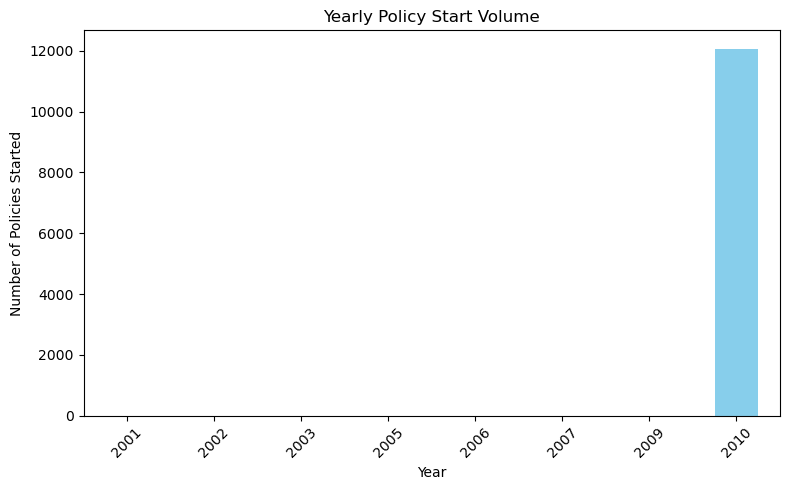

In [45]:
import matplotlib.pyplot as plt

yearly_volume.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title("Yearly Policy Start Volume")
plt.xlabel("Year")
plt.ylabel("Number of Policies Started")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
train["Policy_End_Date"] = pd.to_datetime(train["Policy_End_Date"])

train["Policy_End_Date"] = train["Policy_End_Date"].dt.year

yearly_volume = train["Policy_End_Date"].value_counts().sort_index()

print(yearly_volume)

In [43]:
train["First_Transaction_Date"] = pd.to_datetime(train["First_Transaction_Date"])

train["First_Transaction_Date"] = train["First_Transaction_Date"].dt.year

yearly_volume = train["First_Transaction_Date"].value_counts().sort_index()

print(yearly_volume)

First_Transaction_Date
2001        1
2002        1
2003        2
2005        1
2006        2
2007        1
2009        6
2010    12065
Name: count, dtype: int64


### Focus year: 2010 is the main data year

In [47]:
train_2010 = train[train["Policy_Start_Date"] == 2010]
train_2010

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
14,ID_9QG0NXE,2010,2010,Male,51.000000,2010,3,Saloon,As Attached,Lexus,Victoria Island,Lagos,Customized Motor,0
15,ID_BI6U84E,2010,2010,Male,41.153991,2010,4,Saloon,As Attached,As Attached,Victoria Island,Lagos,Motor Cycle,1
16,ID_USRZ6JE,2010,2010,Male,41.153991,2010,4,Saloon,White,TOYOTA,Victoria Island,Lagos,Muuve,1
17,ID_XFCJ8Y8,2010,2011,Other,93.000000,2010,7,Saloon,White,Honda,Lagos Island,Lagos,CarSafe,0
18,ID_EH2905B,2010,2010,Male,41.153991,2010,4,Saloon,As Attached,TOYOTA,Victoria Island,Lagos,CVTP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_MLGO8DZ,2010,2011,Male,51.000000,2010,4,Saloon,Black,Honda,Victoria Island,Lagos,Car Classic,0
12075,ID_62LBOWI,2010,2011,Male,44.000000,2010,1,JEEP,Silver,Hyundai,Victoria Island,Lagos,Car Classic,0
12076,ID_XR8F115,2010,2011,Male,37.000000,2010,1,JEEP,Silver,Hyundai,Anthony Village,Lagos,CarSafe,0
12077,ID_8P2UGYO,2010,2011,Male,20.000000,2010,1,Saloon,Silver,Kia,Anthony Village,Lagos,CarSafe,0


### Popular Product Name(Insurance Policy)

In [49]:
product_name_counts = train_2010["ProductName"].value_counts()
print("Policy Count by Product Type in 2010:")
print(product_name_counts)

Policy Count by Product Type in 2010:
ProductName
Car Classic         6480
CarSafe             3771
Customized Motor     545
Car Plus             486
CVTP                 467
CarFlex              176
Muuve                 93
Motor Cycle           46
Car Vintage            1
Name: count, dtype: int64


### Most Insured Vehicle Makes


In [52]:
top_makes = train_2010["Subject_Car_Make"].value_counts().head(10)
print("Top 10 Vehicle Makes:")
print(top_makes)

Top 10 Vehicle Makes:
Subject_Car_Make
TOYOTA        6296
Honda         1349
Lexus          763
Mercedes       621
Hyundai        574
Kia            409
Ford           402
Nissan         286
Volkswagen     152
Iveco          151
Name: count, dtype: int64


### Customers with more than one policy

In [80]:
train.columns

Index(['ID', 'Policy_Start_Date', 'Policy_End_Date', 'Gender', 'Age',
       'First_Transaction_Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

In [91]:
customers_with_multiple_policies = train[train['No_Pol'] == 10]

# Reset index to treat it as Customer_ID for display
customers_with_multiple_policies = customers_with_multiple_policies.reset_index().rename(columns={'index': 'Customer_ID'})

# Select and display relevant columns
result = customers_with_multiple_policies[['ID', 'Gender', 'No_Pol', 'Car_Category', 'Subject_Car_Make', 'Policy_Start_Date', 'Policy_End_Date', 'Age', 'ProductName']]

# Display as a table
result.head(10)


,ID,Gender,No_Pol,Car_Category,Subject_Car_Make,Policy_Start_Date,Policy_End_Date,Age,ProductName
0,ID_VKZD12C,Entity,10,Saloon,Ford,2010-10-01,2011-09-30,30.0,CVTP
1,ID_KGZGAIN,Entity,10,Motorcycle,TOYOTA,2010-10-01,2011-09-30,30.0,CVTP
2,ID_CMJ0C4D,Entity,10,Motorcycle,TOYOTA,2010-10-01,2011-09-30,30.0,Motor Cycle
3,ID_SI1RIFV,Entity,10,JEEP,Isuzu,2010-10-01,2011-09-30,30.0,CVTP
4,ID_RIAUAX3,Entity,10,Saloon,TOYOTA,2010-10-01,2011-09-30,30.0,Muuve
5,ID_6T6EYUD,Entity,10,Saloon,Mitsubishi,2010-10-01,2011-09-30,30.0,CarSafe
6,ID_P4I2FTY,Entity,10,Saloon,Nissan,2010-10-01,2011-09-30,30.0,CarSafe
7,ID_NGHH9VO,Entity,10,Saloon,TOYOTA,2010-10-21,2011-09-30,30.0,CVTP
8,ID_45EY454,Entity,10,Saloon,Isuzu,2010-10-21,2011-09-30,30.0,CVTP
